# Baseline2 - Preprocessing (Wav2Vec Features) - PT-BR-SER (Coraa V6)

This is an example of pre-processing audio segments to extract features through the pre-trained Wav2Vec model (small). We use the Fairseq toolkit. No fine-tuning was performed and we only used the audio embedding extracted from the pre-trained model.

We use raw audio, i.e., no pre-processing or cleaning has been done beforehand. Participants can pre-process the audio to improve the quality of extracted features. We also recommend using the latest pre-trained models, fine-tuning and data augmentation.

# Download Dataset

* https://drive.google.com/drive/folders/12Nuv8J7pBHJuNU3nH2c7F8VwCDEE6GDt

In [ ]:
!gdown --id 1N56YOgJ_plF4K8Eyh9hqiP0_O5L8uwya

Downloading...
From: https://drive.google.com/uc?id=1N56YOgJ_plF4K8Eyh9hqiP0_O5L8uwya
To: /content/data_train.zip
100% 61.4M/61.4M [00:01<00:00, 36.9MB/s]


In [ ]:
!unzip data_train.zip

Archive:  data_train.zip
   creating: train/
  inflating: train/bfamcv01_segment163_neutral.wav  
  inflating: train/bfamcv01_segment168_non-neutral-male.wav  
  inflating: train/bfamcv01_segment170_non-neutral-male.wav  
  inflating: train/bfamcv01_segment173_neutral.wav  
  inflating: train/bfamcv01_segment177_neutral.wav  
  inflating: train/bfamcv01_segment181_neutral.wav  
  inflating: train/bfamcv01_segment191_non-neutral-male.wav  
  inflating: train/bfamcv01_segment194_neutral.wav  
  inflating: train/bfamcv01_segment195_neutral.wav  
  inflating: train/bfamcv01_segment200_non-neutral-male.wav  
  inflating: train/bfamcv02_segment100_neutral.wav  
  inflating: train/bfamcv02_segment110_non-neutral-female.wav  
  inflating: train/bfamcv02_segment116_non-neutral-female.wav  
  inflating: train/bfamcv02_segment157_neutral.wav  
  inflating: train/bfamcv02_segment179_neutral.wav  
  inflating: train/bfamcv02_segment185_neutral.wav  
  inflating: train/bfamcv02_segment200_non-neutra

In [ ]:
from os import listdir
from os.path import isfile, join
import pandas as pd

train_data_dir = 'train'

train_audio_files = [f for f in listdir(train_data_dir) if isfile(join(train_data_dir, f))]

L = []
for f in train_audio_files:
  v = f.replace('.wav','').split('_')
  L.append([f,v[len(v)-1]])

df_data = pd.DataFrame(L)
df_data.columns = ['file','label']

In [ ]:
df_data

,file,label
0,bpubdl10_segment98_neutral.wav,neutral
1,bfamdl09_segment422_neutral.wav,neutral
2,bfamdl24_segment283_non-neutral-male.wav,non-neutral-male
3,bpubcv01_segment176_neutral.wav,neutral
4,bpubdl08_segment283_neutral.wav,neutral
...,...,...
620,bfammn03_segment211_non-neutral-male.wav,non-neutral-male
621,bfamcv28_segment225_non-neutral-female.wav,non-neutral-female
622,bfamcv04_segment457_non-neutral-female.wav,non-neutral-female
623,bfammn32_segment136_non-neutral-female.wav,non-neutral-female


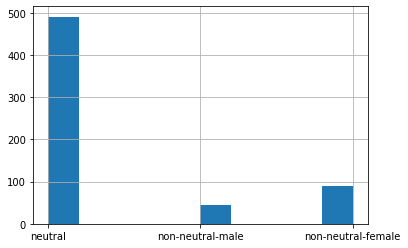

In [ ]:
df_data.label.hist()

# Wav2Vec Features

Related methods.

> Schneider, S., Baevski, A., Collobert, R., & Auli, M. (2019). wav2vec: Unsupervised Pre-Training for Speech Recognition. Proc. Interspeech 2019, 3465-3469.

In [ ]:
!nvidia-smi
!pip install --upgrade fairseq
!pip3 install torch
!wget https://dl.fbaipublicfiles.com/fairseq/wav2vec/wav2vec_small.pt

import torch
from fairseq.models.wav2vec.wav2vec2 import Wav2Vec2Model
import numpy as np
import time
import pandas as pd
import librosa


cp = torch.load('wav2vec_small.pt')
model = Wav2Vec2Model.build_model(cp['args'], None).to('cuda')
model.load_state_dict(cp['model'], strict=False)
model.eval()

def extract_wav2vec(fname):
  global model
  x,fs = librosa.core.load(fname, sr=16000)
  x = torch.tensor(np.expand_dims(x,axis=0)).cuda()
  activations = model.extract_features(x, None)
  features = activations[0].cpu().detach().numpy()[0]
  features = np.mean(features,axis=0).astype(np.float32)
  df = pd.DataFrame([features])
  df['sound_filepath'] = fname
  return df

Tue Oct 26 18:17:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

--2021-10-26 18:17:29--  https://dl.fbaipublicfiles.com/fairseq/wav2vec/wav2vec_small.pt
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.75.142, 104.22.74.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 950500491 (906M) [application/octet-stream]
Saving to: ‘wav2vec_small.pt’

wav2vec_small.pt    100%[===================>] 906.47M  12.1MB/s    in 76s     

2021-10-26 18:18:46 (11.9 MB/s) - ‘wav2vec_small.pt’ saved [950500491/950500491]



In [ ]:
extract_wav2vec('/content/train/bfamcv01_segment163_neutral.wav')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,sound_filepath
0,0.036915,0.024192,0.019366,0.204486,0.386005,-0.083311,0.352507,-0.140205,0.141102,-0.000903,-0.101896,0.367879,0.090478,0.369667,0.276497,0.123335,0.219695,0.049279,-0.081572,-0.508715,-0.130516,-0.137585,-0.03412,0.225177,0.446098,-0.330314,0.205936,-0.150182,-0.166164,0.009623,-0.076334,-0.105544,-0.181973,0.013477,-0.086944,0.030649,-0.444199,0.063158,0.029664,0.057978,...,-0.103893,0.077581,0.216848,-0.088892,0.054465,-0.031819,0.009846,-0.039349,0.007703,-0.136955,0.147792,-0.478917,-0.106633,-0.515449,-0.108635,-0.220407,-0.317915,-0.035027,-0.18943,-0.114136,-0.188151,-0.122692,0.24265,0.074501,0.068838,0.236818,0.24187,0.078656,-0.086837,-0.180333,0.106487,-0.178449,0.070875,-0.538034,0.009492,-0.152802,0.289334,0.196044,-0.490069,/content/train/bfamcv01_segment163_neutral.wav


In [ ]:
from tqdm.notebook import tqdm
R = []
for index,row in tqdm(df_data.iterrows(),total=len(df_data)):
  wav_file = row['file']
  df = extract_wav2vec('train/'+wav_file)
  R.append(df)

  0%|          | 0/625 [00:00<?, ?it/s]

In [ ]:
df_wav2vec = pd.concat(R).reset_index(drop=True)
L = []
for index,row in df_wav2vec.iterrows():
  v = row['sound_filepath'].replace('.wav','').split('_')
  label = v[len(v)-1]
  L.append(label)
df_wav2vec['label'] = L
df_wav2vec

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,sound_filepath,label
0,-0.035755,0.229154,0.032033,0.212122,0.410117,-0.076203,0.298307,-0.207906,0.016359,-0.072088,-0.091624,0.397148,0.188862,0.332876,0.162598,0.026588,0.190045,-0.047142,-0.067843,-0.706283,-0.126930,-0.129715,0.415801,0.501336,0.263577,-0.376608,0.080551,-0.169354,-0.179505,0.139238,-0.149368,-0.067477,-0.264488,0.021408,-0.074238,0.026499,-0.102121,0.102855,0.022498,-0.103949,...,0.016438,0.380789,-0.055127,0.020700,-0.039803,0.222875,0.060123,0.022767,-0.025159,0.218322,-0.306396,-0.103666,-0.500200,-0.147859,-0.065387,-0.434136,-0.137268,-0.156002,-0.319477,-0.212127,-0.367179,0.284267,0.082241,0.002015,0.255659,0.152446,-0.001078,-0.076764,-0.222177,0.130163,-0.044357,-0.007691,-0.290890,0.019099,-0.076720,0.165534,0.387871,-0.453789,train/bpubdl10_segment98_neutral.wav,neutral
1,0.104712,0.076716,-0.062033,0.279733,0.213700,-0.107718,0.328917,-0.255642,-0.089452,0.114169,-0.214249,-0.109336,-0.264590,0.397051,0.171429,-0.125766,0.094970,-0.007718,-0.027927,-0.382973,-0.305527,-0.110094,-0.580634,0.371012,0.061735,-0.200365,0.092186,-0.057378,-0.231861,0.060225,-0.025657,0.079161,-0.137067,0.056199,-0.300144,0.114169,-0.260584,0.246903,0.010534,-0.327803,...,-0.031802,0.118501,0.189459,0.233312,-0.049090,0.179981,-0.147450,-0.106695,0.143757,0.057413,-0.326141,-0.331138,-0.292354,0.007937,0.136741,-0.513625,-0.148333,-0.319750,-0.002652,-0.109092,-0.207112,0.076101,-0.135805,0.122517,0.141154,0.207957,0.302382,-0.013467,0.043757,0.035764,-0.288137,-0.226268,-0.489989,-0.044529,-0.092519,0.269420,0.302323,-0.454356,train/bfamdl09_segment422_neutral.wav,neutral
2,-0.037862,0.072903,0.044027,0.219397,0.375870,-0.265060,0.237094,-0.228392,-0.035230,-0.100094,-0.130375,0.386566,0.004997,0.294672,0.039932,0.018883,0.340840,0.043754,-0.113265,-0.577647,-0.136967,-0.099782,0.002653,0.386130,0.214113,-0.222744,0.037642,-0.176071,-0.165918,0.088096,-0.173292,-0.035516,-0.294690,0.056125,-0.045657,0.090604,-0.290890,0.134035,0.146835,-0.198309,...,0.012543,0.059222,0.036695,0.067704,-0.062580,0.204336,0.069509,-0.031266,0.048780,0.233612,-0.526514,-0.267779,-0.325656,-0.135644,0.002655,-0.465103,-0.134393,-0.258743,-0.168539,-0.215486,-0.298128,0.047684,0.065195,-0.081664,0.230838,0.109487,0.048330,-0.069684,-0.188169,0.161870,-0.066215,0.058828,-0.674765,-0.039696,-0.198754,0.325795,0.427063,-0.441233,train/bfamdl24_segment283_non-neutral-male.wav,non-neutral-male
3,0.403667,-0.138761,0.223063,0.220868,0.094534,-0.159061,0.177419,-0.163351,-0.129887,0.118348,-0.018728,-0.198422,-0.245405,0.198630,-0.140737,-0.358602,0.037801,0.062446,-0.173939,-0.240216,-0.256576,-0.040270,-0.969349,0.374705,0.280818,0.115316,0.092682,-0.148823,-0.002089,-0.047945,-0.281271,0.019260,-0.176403,0.064036,0.093217,0.348352,-0.310087,0.176589,-0.153338,-0.216465,...,0.112642,-0.124822,0.278334,0.125512,-0.183701,-0.010117,0.021164,-0.068061,0.120886,0.077189,-0.077284,-0.610129,-0.048569,-0.015538,0.234287,-0.403944,-0.099729,-0.181575,0.152061,-0.217609,-0.071433,0.219215,0.048297,-0.059084,0.182762,0.159481,0.252049,-0.013918,0.049962,0.113838,0.068654,0.003527,-0.643015,-0.022212,-0.104452,0.367819,0.238780,-0.053970,train/bpubcv01_segment176_neutral.wav,neutral
4,0.068108,0.003501,0.275467,0.095260,0.150628,-0.257726,0.267657,-0.147476,-0.129865,-0.008251,-0.076740,0.382001,0.020251,0.329581,0.058635,-0.053953,0.158177,0.096603,-0.110192,-0.343603,-0.102141,-0.040838,-0.486973,0.489239,0.194884,-0.150287,0.131126,-0.162447,0.048999,0.207483,-0.358296,-0.118504,-0.279661,0.069763,-0.023914,0.282306,-0.423648,0.113549,-0.021782,-0.158010,...,0.059772,-0.035532,0.170175,0.033512,-0.109655,0.158272,-0.095538,0.006427,0.109081,0.122464,-0.125678,-0.383526,-0.321403,-0.061

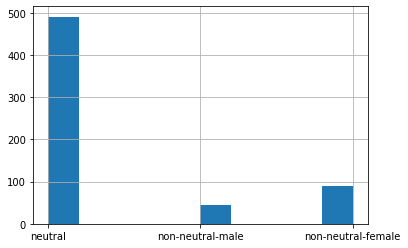

In [ ]:
df_wav2vec.label.hist()

In [ ]:
df_wav2vec.to_csv('wav2vec_features.csv',index=False)